In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.f' % x)

file_name_CARGO = "Контейнерные перевозки (просто сегменты).xlsx"
# df = open(file_name_CARGO, encoding='latin-1')
df = pd.read_excel(file_name_CARGO, skiprows=5, skipfooter=11, sheet_name="Сегменты", index_col=0)
df = df.drop(columns={"Рынок итого", "ЕТС итого", "Доля ЕТС"})
df = df.iloc[: , :-26]
df = df.fillna(df.mean())
df = df.T
df = df[['ЛПК', 'Химическая продукция', 'Машиностроение и металлообработка', 'Черная металлургия', 'Жидкие химикаты']]
# df.head()

file_name_TRAFFIC = "грузооборот по россии.xlsx"
TRAFFIC = pd.read_excel(file_name_TRAFFIC, skiprows=29, index_col=0).filter(['дата', 'грузооборот (млрд т-км)'])
# TRAFFIC.head()

file_name_VVP = "ввп.xlsx"
VVP = pd.read_excel(file_name_VVP, skiprows=32, index_col=0).filter(['дата', 'ВВП (млрд руб)'])
# VVP.head()

df.index.astype('datetime64[ns]')
VVP.index.astype('datetime64[ns]')
TRAFFIC.index.astype('datetime64[ns]')

new_df = df.merge(TRAFFIC, on=df.index)
new_df = new_df.rename(columns={'key_0': 'дата'})
new_df = new_df.set_index('дата')
new_df
new_df_2 = new_df.merge(VVP, on=new_df.index)
new_df_2 = new_df_2.rename(columns={'key_0': 'дата'})
new_df_2 = new_df_2.set_index('дата')
df = new_df_2
df = df.drop(columns={'Жидкие химикаты'})

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

standard_X = preprocessing.scale(X)
standard_Y = preprocessing.scale(y)

df

,ЛПК,Химическая продукция,Машиностроение и металлообработка,Черная металлургия,грузооборот (млрд т-км),ВВП (млрд руб)
дата,,,,,,
2019-01-01,940054,358995,359975,324093,236,8662
2019-02-01,934602,373480,394487,293906,216,8045
2019-03-01,1119164,448113,424394,328754,251,8588
2019-04-01,1153440,421184,416330,349420,244,8455
2019-05-01,1018421,439188,438876,365331,249,9167
2019-06-01,971184,476841,460116,368586,231,8397
2019-07-01,1104764,498014,492318,403504,239,10047
2019-08-01,1089044,478482,480080,365178,240,9199
2019-09-01,1013004,457305,474989,352607,238,9934


ЛПК: 
W-статистика: 0.963826060295105 
p-value: 0.4723808765411377 

Химическая продукция: 
W-статистика: 0.9430975914001465 
p-value: 0.15923215448856354 

Машиностроение и металлообработка: 
W-статистика: 0.9626293182373047 
p-value: 0.44591638445854187 

Черная металлургия: 
W-статистика: 0.9093565344810486 
p-value: 0.025483038276433945 

грузооборот (млрд т-км): 
W-статистика: 0.9648318290710449 
p-value: 0.49541208148002625 

ВВП (млрд руб): 
W-статистика: 0.9727712273597717 
p-value: 0.6959710717201233 



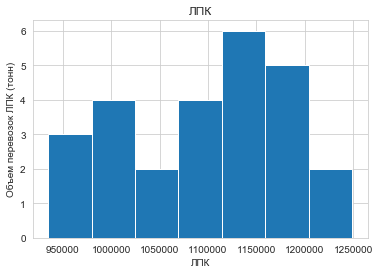

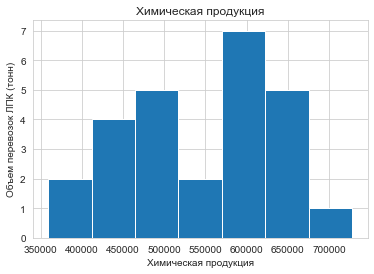

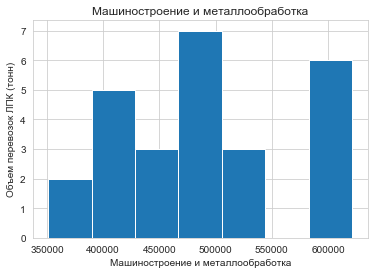

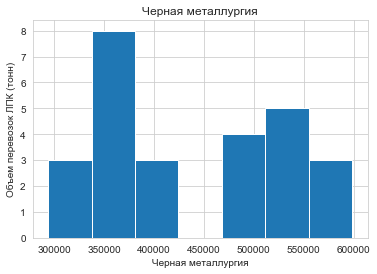

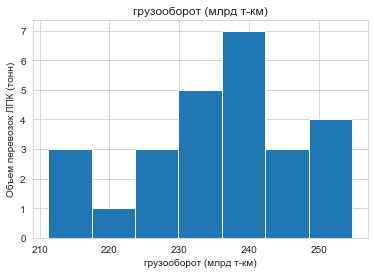

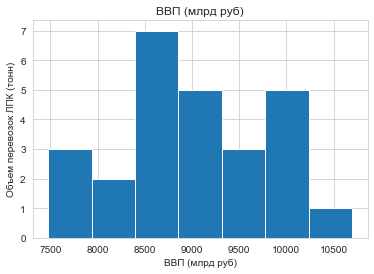

In [82]:
import seaborn as sns
sns.set_style('whitegrid')
for col in df.columns:
    hist = df.hist(column=col, bins=7)
    plt.ylabel("Объем перевозок ЛПК (тонн)")
    plt.xlabel(col)

from scipy.stats import shapiro

for col in df.columns:
    stat, p = shapiro(df[col])
    print(col + ":", "\nW-статистика:", stat, "\np-value:", p, "\n")

In [144]:
# Для соотношения грузооборота и ЛПК приходится нормализовывать данные
# X_train, X_test, y_train, y_test = train_test_split(standard_X[:,1].reshape(-1, 1), standard_Y, train_size=0.65, shuffle=False)

# X_train, X_test, y_train, y_test = train_test_split(X[:,1].reshape(-1, 1), y, train_size=0.65, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, shuffle=False)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# y_pred = lin_reg.predict(X_test)

# pred = pd.DataFrame(np.concatenate((y_train, y_pred)))

print(f'Веса уравнения линейной регрессии: {lin_reg.coef_}')
print(f'Смещение (betta_0): {lin_reg.intercept_}')
print(f'R^2 статистика: {lin_reg.score(X, y)}')

# print(f'R^2 статистика: {lin_reg.score(standard_X[:,1].reshape(-1, 1), pred)}')

# print(f'R^2 статистика: {lin_reg.score(X[:,1].reshape(-1, 1), pred)}')

# plt.figure(figsize=(14, 6))
# plt.plot(df.index, y, alpha=0.7, linewidth = 3)
# plt.plot(df.index, pred[0], alpha=0.7, linewidth = 3)
# plt.legend(['Фактический объем перевозок ЛПК', 'Плановый обем перевозок ЛПК'])
# plt.xlabel("Время", fontsize = 15)
# plt.ylabel(df.columns[0] + " (тонн)", fontsize = 15)
# plt.grid()
# plt.show()

import statsmodels.api as sm

# X_constant = sm.add_constant(X[:,0:])
lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())
# print("\nСреднее остатков: ", lin_reg.resid.mean())

Веса уравнения линейной регрессии: [ 4.82226553e-01  1.99906962e-01  3.06495294e-01  4.02157121e+03
 -3.68591104e+01]
Смещение (betta_0): 3269.550351039041
R^2 статистика: 0.5929253623930268
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2306.
Date:                Thu, 19 May 2022   Prob (F-statistic):                    5.09e-28
Time:                        19:23:47   Log-Likelihood:                         -316.63
No. Observations:                  26   AIC:                                      643.3
Df Residuals:                      21   BIC:                                      649.6
Df Model:                           5                                                  
Covariance Type: 

In [28]:
# Метод Монте-Карло

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

list_for_simulations = []
count = 10

for i in range(count):
    Monte_Carlo_LPK = np.random.normal(df['ЛПК'].mean(), 
                                       df['ЛПК'].std(), 
                                       len(df['ЛПК'])-16).round(0)
    Monte_Carlo_CHEMICAL = np.random.normal(df['Химическая продукция'].mean(), 
                                            df['Химическая продукция'].std(), 
                                            len(df['Химическая продукция'])-16).round(0)
    Monte_Carlo_AUTO = np.random.normal(df['Машиностроение и металлообработка'].mean(), 
                                        df['Машиностроение и металлообработка'].std(), 
                                        len(df['Машиностроение и металлообработка'])-16).round(0)
    Monte_Carlo_MINERAL = np.random.normal(df['Черная металлургия'].mean(), 
                                           df['Черная металлургия'].std(), 
                                           len(df['Черная металлургия'])-16).round(0)
    Monte_Carlo_TRAFFIC = np.random.normal(df['грузооборот (млрд т-км)'].mean(), 
                                           df['грузооборот (млрд т-км)'].std(), 
                                           len(df['грузооборот (млрд т-км)'])-16).round(0)  # Создадим список смоделированных значений грузооборота
    Monte_Carlo_VVP = np.random.normal(df['ВВП (млрд руб)'].mean(), 
                                       df['ВВП (млрд руб)'].std(), 
                                       len(df['ВВП (млрд руб)'])-16).round(0)
    
    AAA_df = pd.DataFrame(index=range(count), data={'ЛПК (Монте-Карло)': Monte_Carlo_LPK,
                                                    'Химическая продукция (Монте-Карло)': Monte_Carlo_CHEMICAL,
                                                    'Машиностроение и металлообработка (Монте-Карло)': Monte_Carlo_AUTO,
                                                    'Черная металлургия (Монте-Карло)': Monte_Carlo_MINERAL,
                                                    'грузооборот (млрд т-км) (Монте-Карло)': Monte_Carlo_TRAFFIC,
                                                    'ВВП (млрд руб) (Монте-Карло)': Monte_Carlo_VVP})

    list_for_simulations.append([AAA_df['ЛПК (Монте-Карло)'].sum().round(0)/count,
                                AAA_df['Химическая продукция (Монте-Карло)'].sum().round(0)/count,
                                AAA_df['Машиностроение и металлообработка (Монте-Карло)'].sum().round(0)/count,
                                AAA_df['Черная металлургия (Монте-Карло)'].sum().round(0)/count,
                                AAA_df['грузооборот (млрд т-км) (Монте-Карло)'].sum().round(0)/count,
                                AAA_df['ВВП (млрд руб) (Монте-Карло)'].sum().round(0)/count])

results_df = pd.DataFrame.from_records(list_for_simulations, columns=['ЛПК','Химическая продукция',
                                       'Машиностроение и металлообработка','Черная металлургия',
                                       'грузооборот (млрд т-км)','ВВП (млрд руб)'])
results_df

# X = results_df.iloc[:, 1].values
# y = results_df.iloc[:, 0].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

# regressor = LinearRegression()
# regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
# # X_train.reshape(1, -1)
# # y_train.reshape(1, -1)
# print("Остатки: ", regressor.intercept_)
# print("\nКоэффициенты:")
# list(zip(results_df, regressor.coef_))

# y_pred = regressor.predict(X_test.reshape(-1, 1))
# y_pred
# results_df['грузооборот (млрд т-км)'].plot(kind='hist', title='Historical % to Target Distribution');

,ЛПК,Химическая продукция,Машиностроение и металлообработка,Черная металлургия,грузооборот (млрд т-км),ВВП (млрд руб)
0,1115440,558491,506515,410031,235,8886
1,1123679,521662,464862,453338,241,8528
2,1096249,527107,517427,454560,233,8844
3,1103996,522784,504839,421848,237,9128
4,1093952,547560,466911,432495,237,9234
5,1067338,500292,491964,433420,234,8685
6,1102335,606084,494779,468584,229,8780
7,1075252,605628,510328,484556,238,9157
8,1067834,575265,510554,479491,241,9090
9,1098426,514516,515071,409908,226,9183


Остатки:  -266865.3374097876

Коэффициенты:
[('ЛПК', 5478.327423161322)]


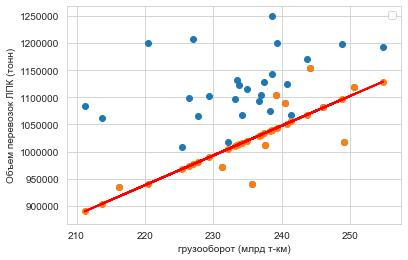

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

temp_df = pd.concat([df, results_df])

# X_MK_temp = results_df.iloc[:, 1:].values
# y_MK_temp = results_df.iloc[:, 0].values

# pred_X_MK = pd.DataFrame(np.concatenate((X, X_MK_temp)))
# pred_y_MK = pd.DataFrame(np.concatenate((y, y_MK_temp)))

X_MK = temp_df.iloc[:, 1:].values
y_MK = temp_df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X_MK[:,3].reshape(-1, 1), y_MK, test_size=0.7, shuffle=False)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Остатки: ", regressor.intercept_)
print("\nКоэффициенты:")
print(list(zip(temp_df, regressor.coef_)))

y_pred = regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred = pd.DataFrame(np.concatenate((y_train, y_pred)))
plt.legend(['Фактический объем перевозок ЛПК', 'Плановый обем перевозок ЛПК'])

plt.ylabel("Объем перевозок ЛПК (тонн)")
plt.xlabel(results_df.columns[4])
plt.scatter(X_MK[:,3], y_MK) #Обычный график скаттер
plt.scatter(X_MK[:,3], pred[0]) #скаттер с предиктед Y
plt.plot(X_MK[:,3].reshape(-1, 1), regressor.predict(X_MK[:,3].reshape(-1, 1)), color='red', linewidth=2) #Линия регрессии
plt.show()

C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: Fu

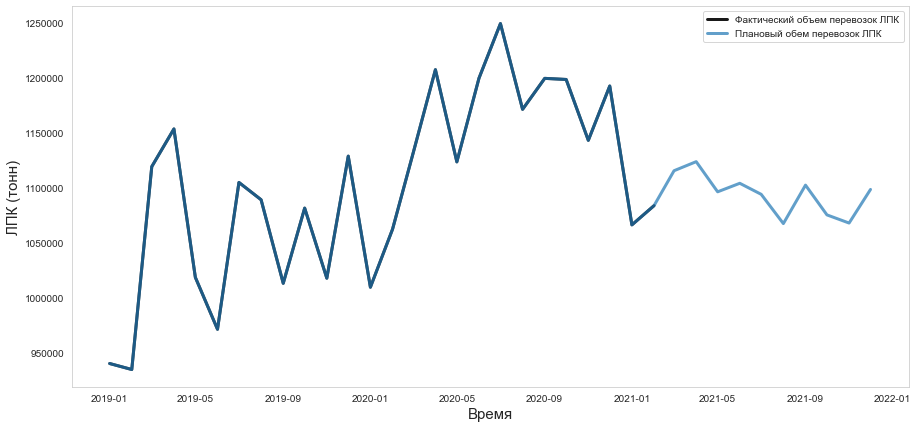

R^2 статистика: -1.220205149025099


In [78]:
# temp_df
# temp_df.to_excel('MK.xlsx', encoding="UTF-8")

temp_file_MK = "MK.xlsx"
# df = open(file_name_CARGO, encoding='latin-1')
df_temp_2 = pd.read_excel(temp_file_MK, index_col=0)
# df_temp_2

plt.figure(figsize=(15, 7))
plt.plot(df.index, y[0:], alpha=0.9, linewidth = 3, color='black')
plt.plot(df_temp_2.index, df_temp_2['ЛПК'], alpha=0.7, linewidth = 3)
plt.legend(['Фактический объем перевозок ЛПК', 'Плановый обем перевозок ЛПК'])
plt.xlabel("Время", fontsize = 15)
plt.ylabel(df_temp_2.columns[0] + " (тонн)", fontsize = 15)
plt.grid()
plt.show()

# y[0:]
print(f'R^2 статистика: {regressor.score(X_MK[:,3].reshape(-1, 1), y_MK)}')